In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import the data set, glimpse data set, get summary statistics

In [81]:
penguins = pd.read_csv("penguins.csv")

In [82]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [83]:
from IPython.display import Image
img = 'penguins.png'
Image(url=img)

In [84]:
penguins.shape

(344, 8)

In [85]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [86]:
penguins["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [87]:
penguins["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [88]:
penguins["sex"].value_counts()

male      168
female    165
Name: sex, dtype: int64

In [89]:
penguins["year"].value_counts()

2009    120
2008    114
2007    110
Name: year, dtype: int64

In [90]:
# How many NA values?
penguins.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


In [91]:
#sum true(na) values
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [92]:
# Drop the missing data
penguins = penguins.dropna(how = "any")
# ‘any’ : If any NA values are present, drop that row or column.
# ‘all’ : If all values are NA, drop that row or column.
penguins.shape

(333, 8)

## 2. Find associations among different variables

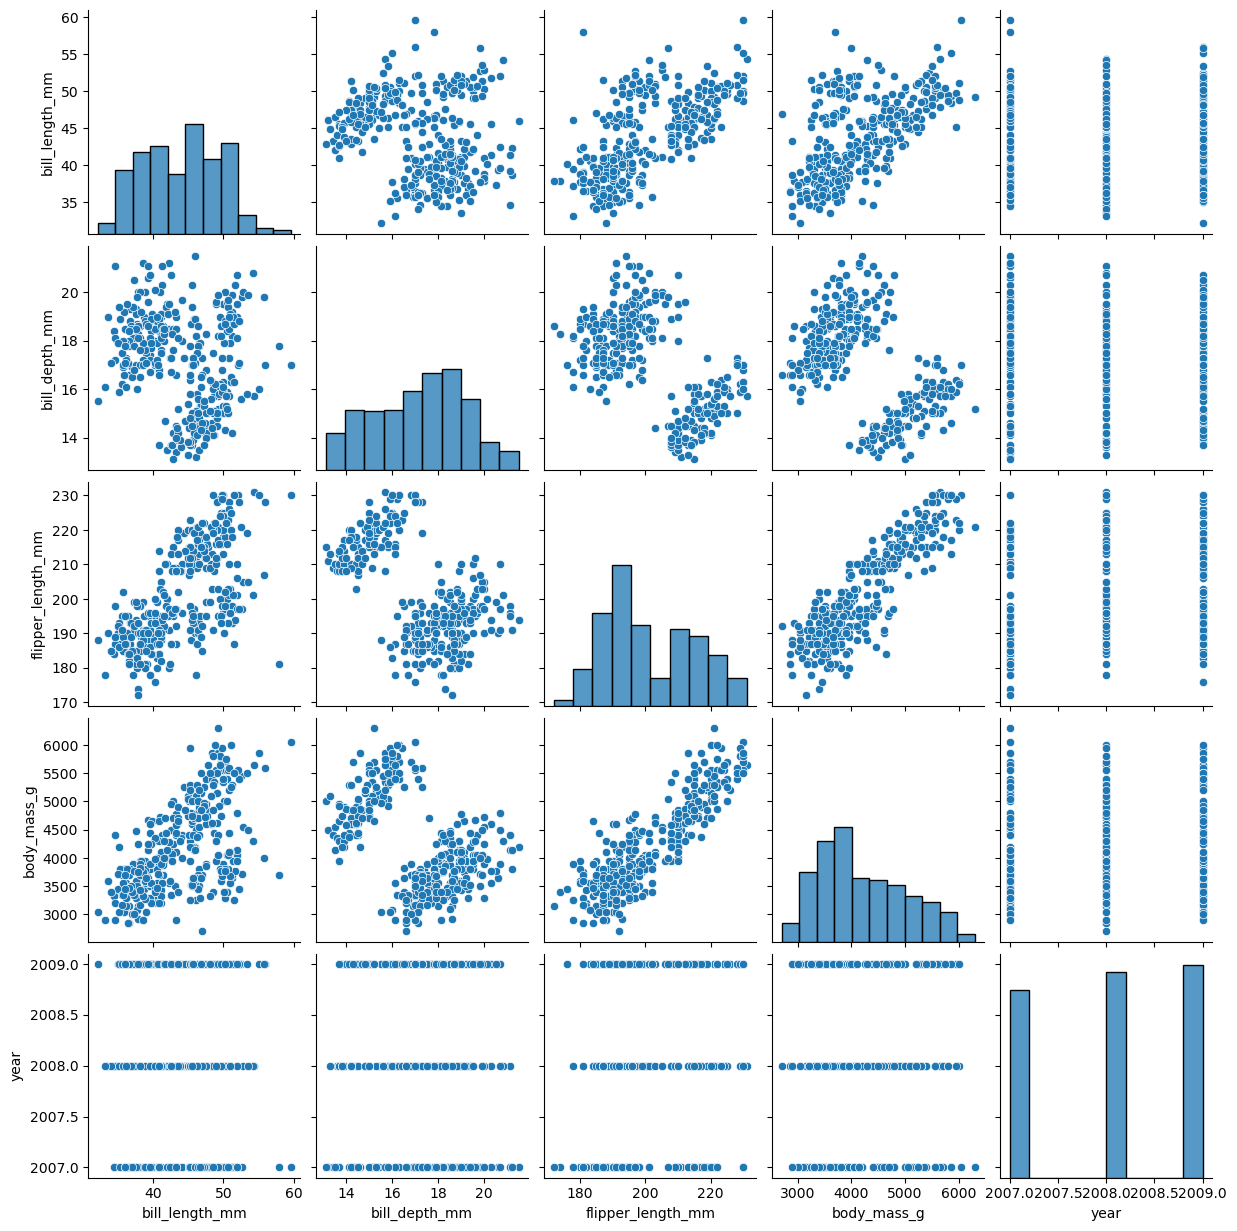

In [93]:
#Find associations among different variables
sns.pairplot(penguins)

In [94]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

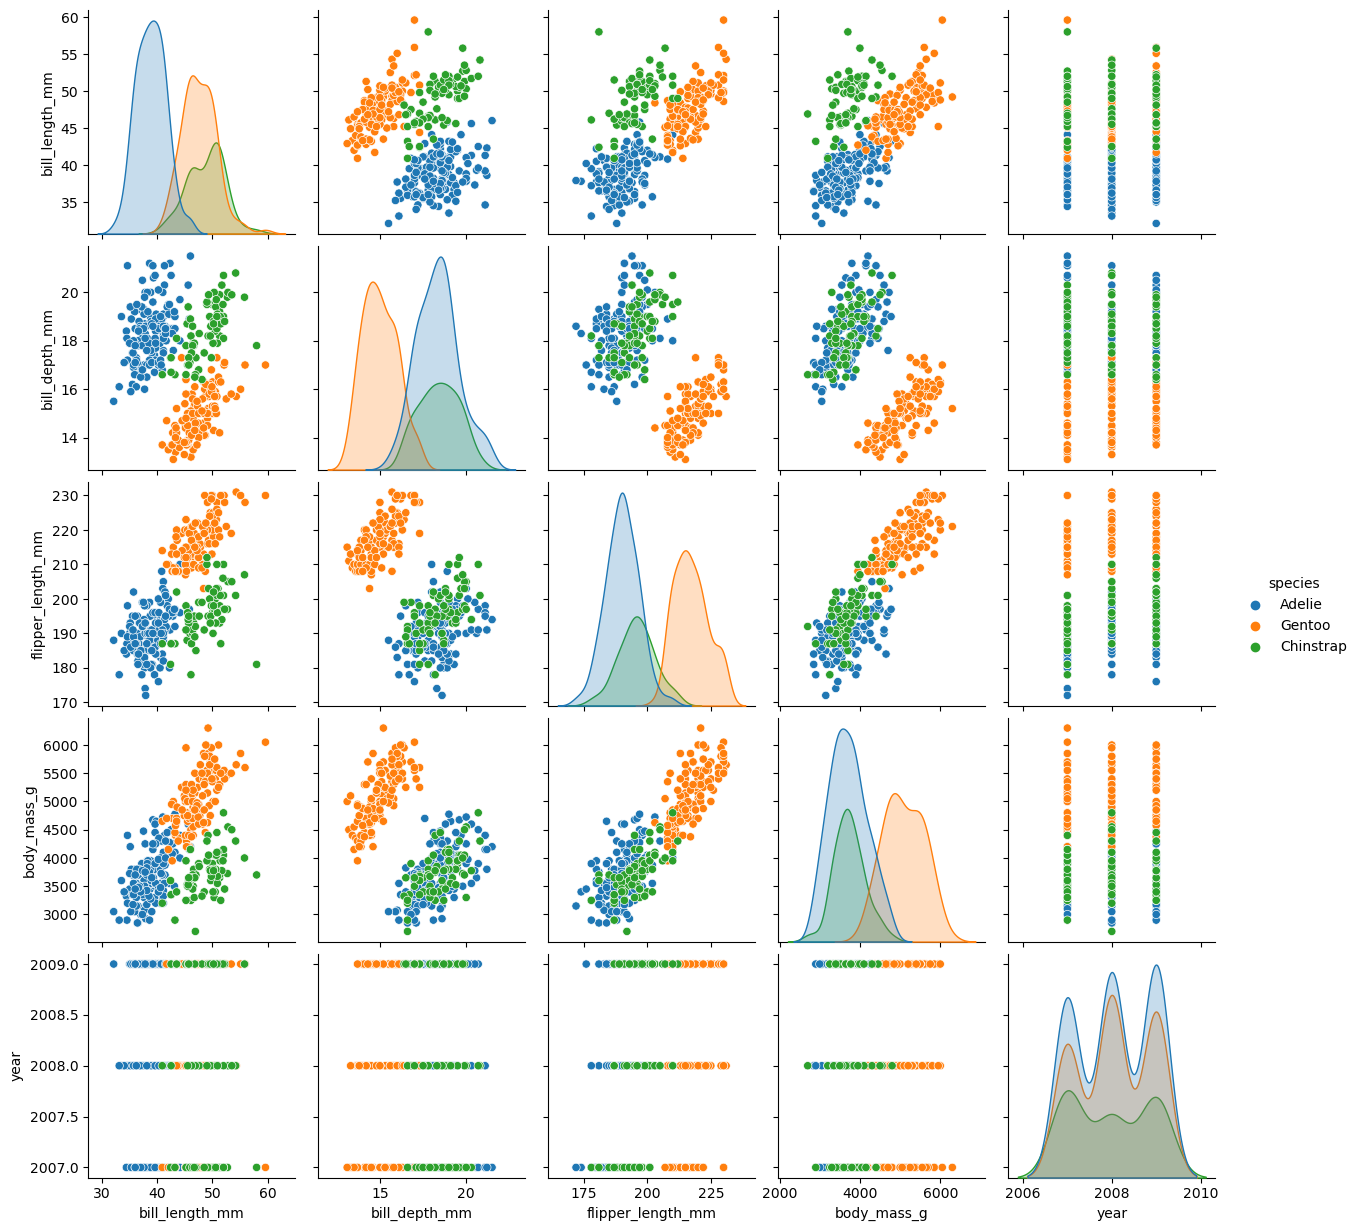

In [95]:
sns.pairplot(penguins, hue = "species")

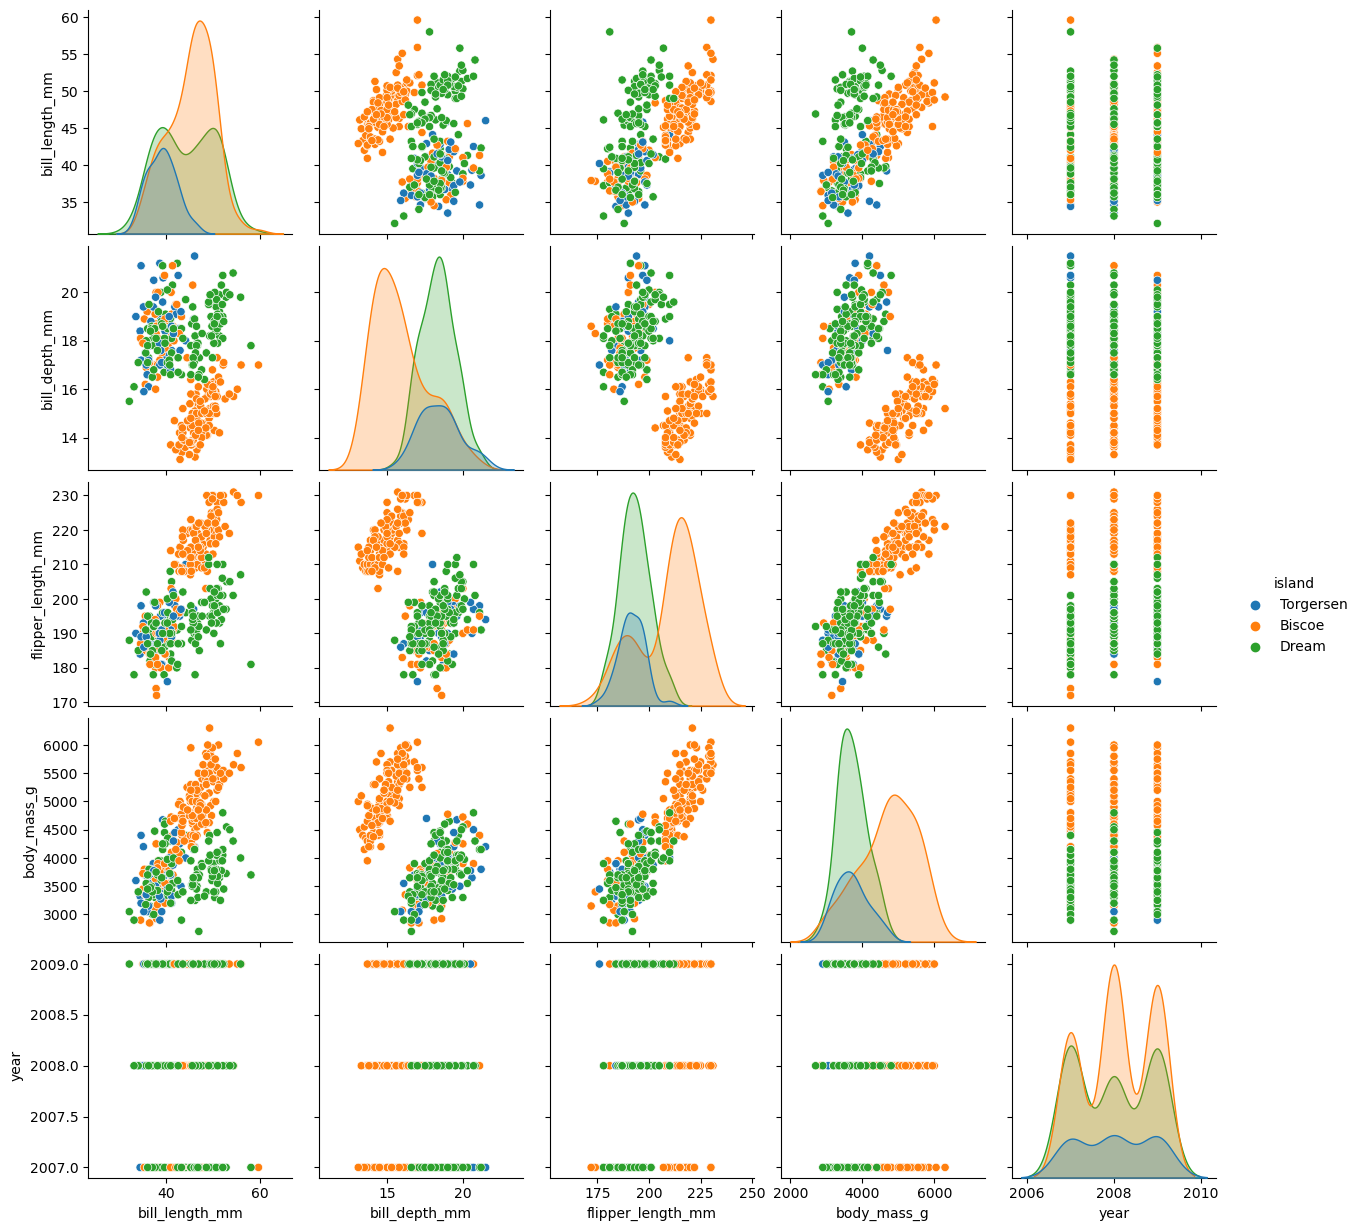

In [96]:
sns.pairplot(penguins, hue = "island")

### Heatmap using correlation

<Axes: >

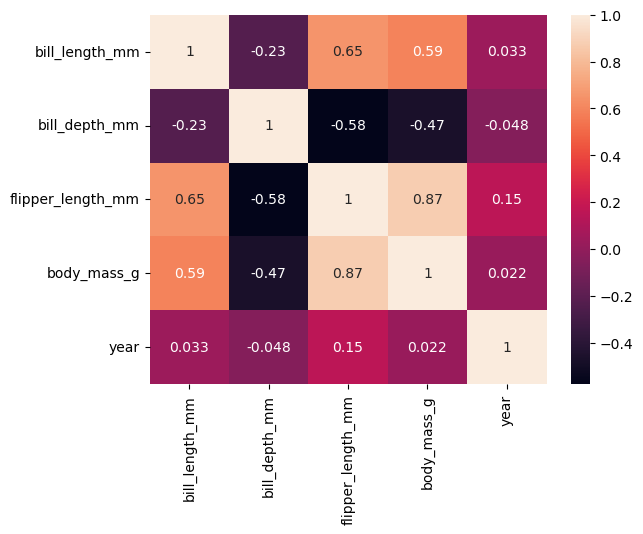

In [97]:
# calculate the correlation matrix on the numeric columns
corr = penguins.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, annot = True)

#see that the most closely related variables are flipper_length_mm and body_mass_g, cor(body_mass_g,flipper_length_mm)=0.87
#year is not really associated with any variable

### Contingency table (also known as a cross tabulation or crosstab) 
is a type of table in a matrix format that displays the multivariate frequency distribution of the variables.

In [98]:
pd.crosstab(penguins['species'], penguins['island'])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,0,68,0
Gentoo,119,0,0


For `Adelie` penguins, do different habitats (island) affect their physical conditions?

we see that In the `Torgersen` island, only `Adelie` penguin lives. Gentoo` penguin only lives in `Biscoe`, whereas `Chinstrap` penguin only lives in `Dream`.`Adelie` penguin lives across three different islands. Then you might want to ask whether their habitat affects their physical conditions.

In [99]:
adelie = penguins[penguins['species']=='Adelie']
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [100]:
adelie['species'].unique()

array(['Adelie'], dtype=object)

In [101]:
#see any difference in mean/std of 4 measurements across 3 different island?
stat_list = ["mean", "std"]
func_dictionary = {"bill_length_mm": stat_list, "bill_depth_mm": stat_list, "flipper_length_mm": stat_list, "body_mass_g": stat_list}
adelie.groupby("island")[["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]].agg(func_dictionary)

bill_length_mm           bill_depth_mm           flipper_length_mm  \
                    mean       std          mean       std              mean   
island                                                                         
Biscoe         38.975000  2.480916     18.370455  1.188820        188.795455   
Dream          38.520000  2.484276     18.240000  1.140598        189.927273   
Torgersen      39.038298  3.028097     18.451064  1.346472        191.531915   

                     body_mass_g              
                std         mean         std  
island                                        
Biscoe     6.729247  3709.659091  487.733722  
Dream      6.480325  3701.363636  448.774519  
Torgersen  6.220062  3708.510638  451.846351

<Axes: xlabel='island', ylabel='bill_depth_mm'>

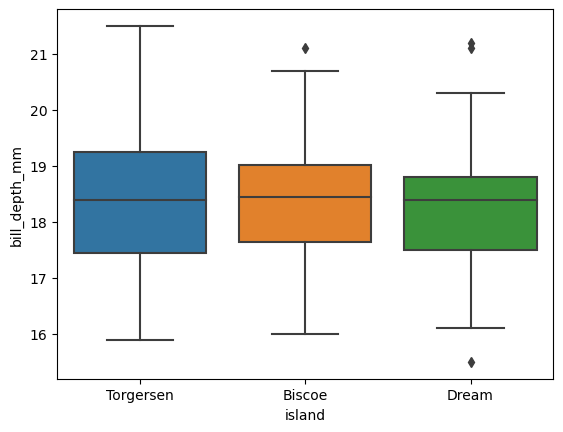

In [102]:
sns.boxplot(data = adelie, x = "island", y = "bill_depth_mm")

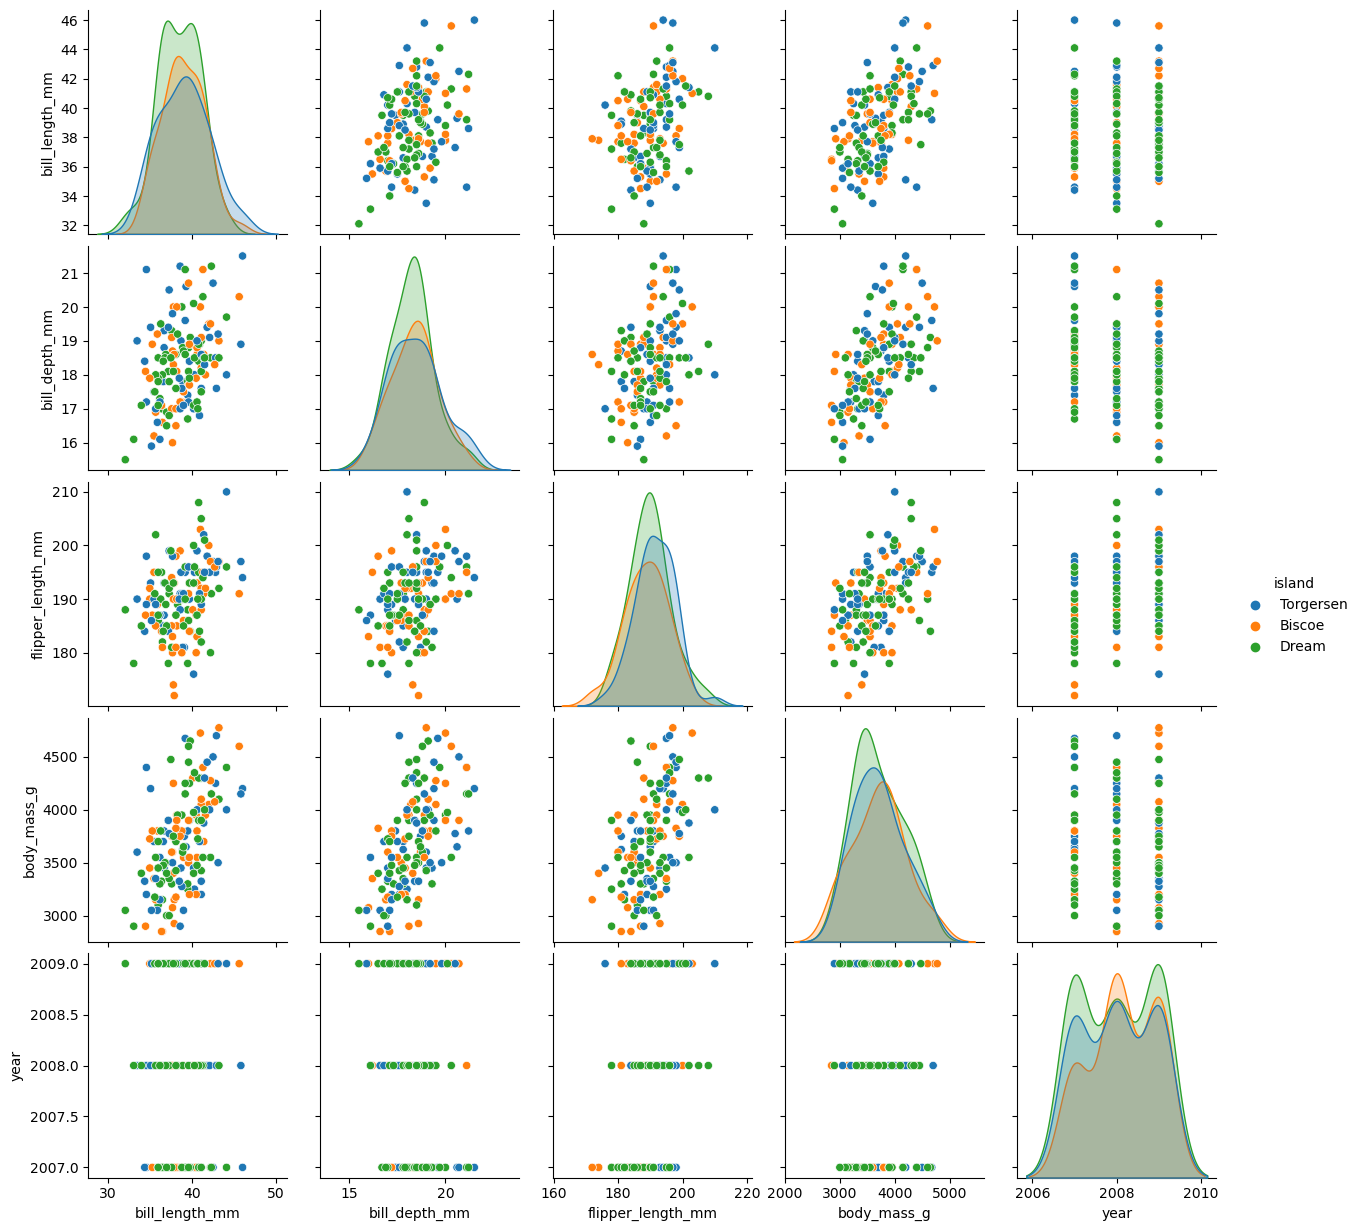

In [103]:
sns.pairplot(adelie, hue = 'island')

So there is not enough evidence that physical conditions of `Adelie` penguins are affected by different habitats.

## 4. Association between `body_mass_g` and `flipper_length_mm`: linear regression, confidence interval, and prediction interval.

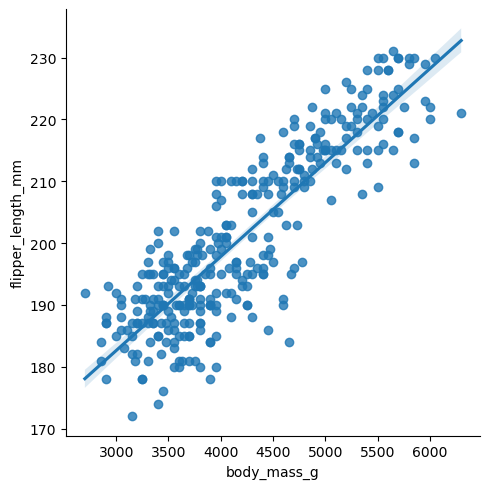

In [104]:
sns.lmplot(data = penguins, x = "body_mass_g", y = "flipper_length_mm")

In [105]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
# Create a least squares model for the 'flipper_length_mm' and 'body_mass_g' variables from our data set
y = penguins["flipper_length_mm"]
x = penguins["body_mass_g"]
X = sm.add_constant(x)
penguins_model1 = sm.OLS(y, X)
fit1 = penguins_model1.fit()
#fitting means we find the best parameter that explain best association between 2 variables
# Display the summary of our model
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          3.13e-105
Time:                        13:28:55   Log-Likelihood:                -1112.1
No. Observations:                 333   AIC:                             2228.
Df Residuals:                     331   BIC:                             2236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         137.0396      1.999     68.562      0.000     133.108     140.972
body_mass_g     0.0152      0.000     32.562      0.000       0.014       0.016
==============================================================================
Omnibus:                       11.941   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.696
Skew:                          -0.474   Prob(JB):                      0.00175
Kurtosis:                       2.872   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### confidence interval vs prediction interval

- **Confidence intervals** estimate the range of a population parameter (mean in our case), given a sample, with a certain level of confidence.

- **Prediction intervals** estimate the range within which a future observation or data point will fall, given a statistical model, with a certain level of confidence.(individual penguin)

In [106]:
### Use this result for prediction, i.e., given a penguin's body mass, what should be its flipper mass?

test_body_mass = [4500, 5000, 5500]
test_body_mass = sm.add_constant(test_body_mass)
#add a constant (intercept) term to a set of independent variables

predictions = fit1.get_prediction(exog = test_body_mass)
#exog refers to the exogenous variable(s), which are the independent variable(s) using to make predictions
predictions.summary_frame(alpha=0.05)
#alpha is set to 0.05, corresponds to a 95% confidence level. 

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,205.418313,0.399321,204.632786,206.203839,191.927049,218.909576
1,213.015945,0.526964,211.979323,214.052567,199.507735,226.524155
2,220.613577,0.710499,219.215914,222.011240,207.072876,234.154279


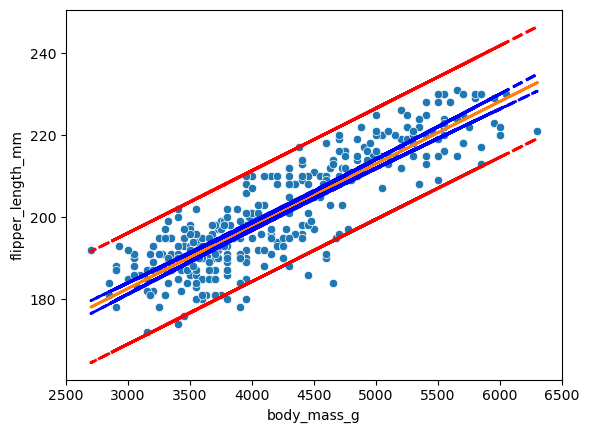

In [107]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table

predictions_total = fit1.get_prediction(X)
predictions_total_summary = predictions_total.summary_frame(alpha=0.05)

fitted_values = predictions_total_summary.iloc[:,0]
mean_ci_lower = predictions_total_summary.iloc[:,2]
mean_ci_upper = predictions_total_summary.iloc[:,3]
obs_ci_lower = predictions_total_summary.iloc[:,4]
obs_ci_upper = predictions_total_summary.iloc[:,5]


sns.scatterplot(penguins, x = "body_mass_g", y = "flipper_length_mm")
plt.plot(X, fitted_values, '-', lw=2)
plt.plot(X, mean_ci_lower, 'b--', lw=2)
plt.plot(X, mean_ci_upper, 'b--', lw=2)
plt.plot(X, obs_ci_lower, 'r--', lw=2)
plt.plot(X, obs_ci_upper, 'r--', lw=2)
plt.xlim(2500,6500)
plt.show()


## 4. Use `bill_length_mm` and `bill_depth_mm` to predict `species`: Support Vector Machine (SVM)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

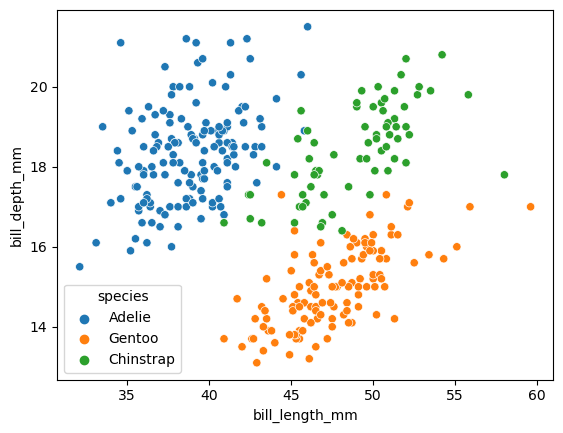

In [108]:
sns.scatterplot(penguins, x = "bill_length_mm", y ="bill_depth_mm", hue = "species")

It seems that three species are well distinguished across different levels of the combinations of `bill_depth_mm` and `bill_lengh_mm`. It appears that (linear) SVM will work out well to classify the species using these 2 independent variables.

### What is an SVM? How does it work?

In [109]:
img = 'svm_figure.png'
Image(url=img)

Assume we are given a training dataset of $n$ points of the form

\begin{equation}
(x_1, y_1), \cdots, (x_n, y_n),
\end{equation}

where the $y_{i}$ are either 1 or −1, each indicating the class to which the point $x_i$ belongs. We want to find the "maximum-margin hyperplane" that divides the group of points $x_i$ for which $y_i = 1$ from the group of points for which $y_i = -1$, which is defined so that the distance between the hyperplane and the nearest point $x_i$ from either group is maximized.

In [113]:
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

X = penguins.loc[:,["bill_length_mm", "bill_depth_mm"]]
y = penguins.loc[:,"species"]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
#Higher values of C result in a smaller margin but fewer misclassifications.
model2 = svm.LinearSVC(C=C, max_iter=10000, dual="auto")

fit2 = model2.fit(X, y)

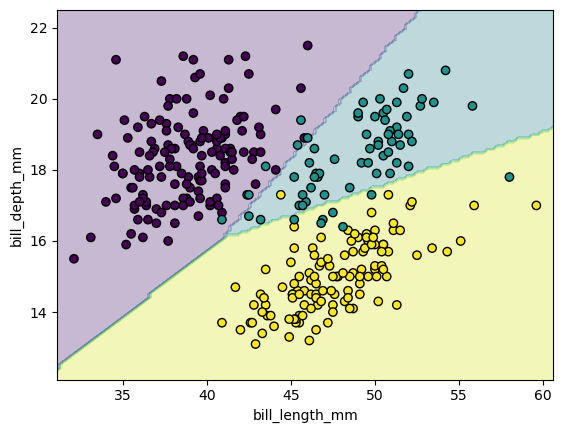

In [116]:
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]

title = "bill depth vs. bill length for penguins of different species"
disp = DecisionBoundaryDisplay.from_estimator(
        model2,
        X,
        response_method="predict",
        alpha=0.3,
        xlabel="bill_length_mm",
        ylabel="bill_depth_mm",
)

cluster_colors = np.array(penguins.groupby('species').ngroup())
#ngroup() is a method that assigns a unique integer label to each group. Adelie: 0, Chinstrap: 1, Gentoo: 2
disp.ax_.scatter(X0, X1, c=cluster_colors, cmap='viridis', label= cluster_colors, edgecolor="k")

In [112]:
test_svm = [[50, 16], [50,18], [40,18]]
fit2.predict(test_svm)

/Users/linyixi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array(['Gentoo', 'Chinstrap', 'Adelie'], dtype=object)

## 5. Feature selection and decision tree

### How does Decision Tree work? (ft. Gini impurity)

Decision Tree selects feature and threshold combination that minimizes the *impurity* in the resulting child nodes, making the classes more homogenous within each node. And then recursion happens for the further children nodes.

[Text(0.5, 0.8333333333333334, 'x[2] <= 206.5\ngini = 0.638\nsamples = 333\nvalue = [146, 68, 119]'),
 Text(0.25, 0.5, 'x[0] <= 43.35\ngini = 0.429\nsamples = 208\nvalue = [144, 63, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.067\nsamples = 145\nvalue = [140, 5, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.148\nsamples = 63\nvalue = [4, 58, 1]'),
 Text(0.75, 0.5, 'x[1] <= 17.65\ngini = 0.107\nsamples = 125\nvalue = [2, 5, 118]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 118\nvalue = [0, 0, 118]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.408\nsamples = 7\nvalue = [2, 5, 0]')]

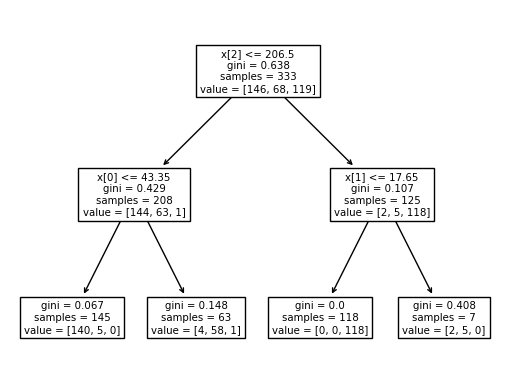

In [42]:
#decision tree
from sklearn import tree

#4 numerical values that'll be used
X = penguins.iloc[:,2:6]
y = penguins.iloc[:,0] #species, y is target variable to predict
model3 = tree.DecisionTreeClassifier(max_depth=2)
model3 = model3.fit(X, y)

tree.plot_tree(model3)
#140 adelie belong to this group

In [43]:
#can make prediction using the model:
#bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g
#200<=206.5 so go to left child node
X_test = [[40, 15, 200, 4000], [40, 15, 210, 4500], [45, 20, 200, 4800]]
model3.predict(X_test)

/Users/linyixi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [44]:
heart = pd.read_csv("heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: >

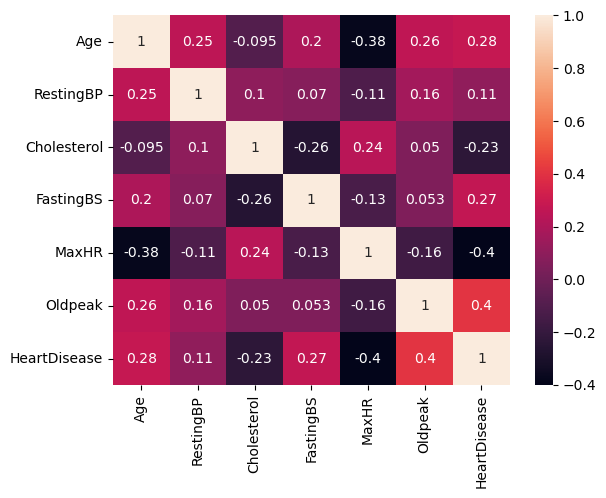

In [46]:
#Draw a correlation heatmap to see the associations among different numerical variables. Which variables have the highest association? How about the lowest?

corr= heart.select_dtypes('number').corr()

sns.heatmap(corr, annot = True)

#highest association(oldpeak,highdisease)=0.4, lowest association(fastingbs,restingbp)=0.07


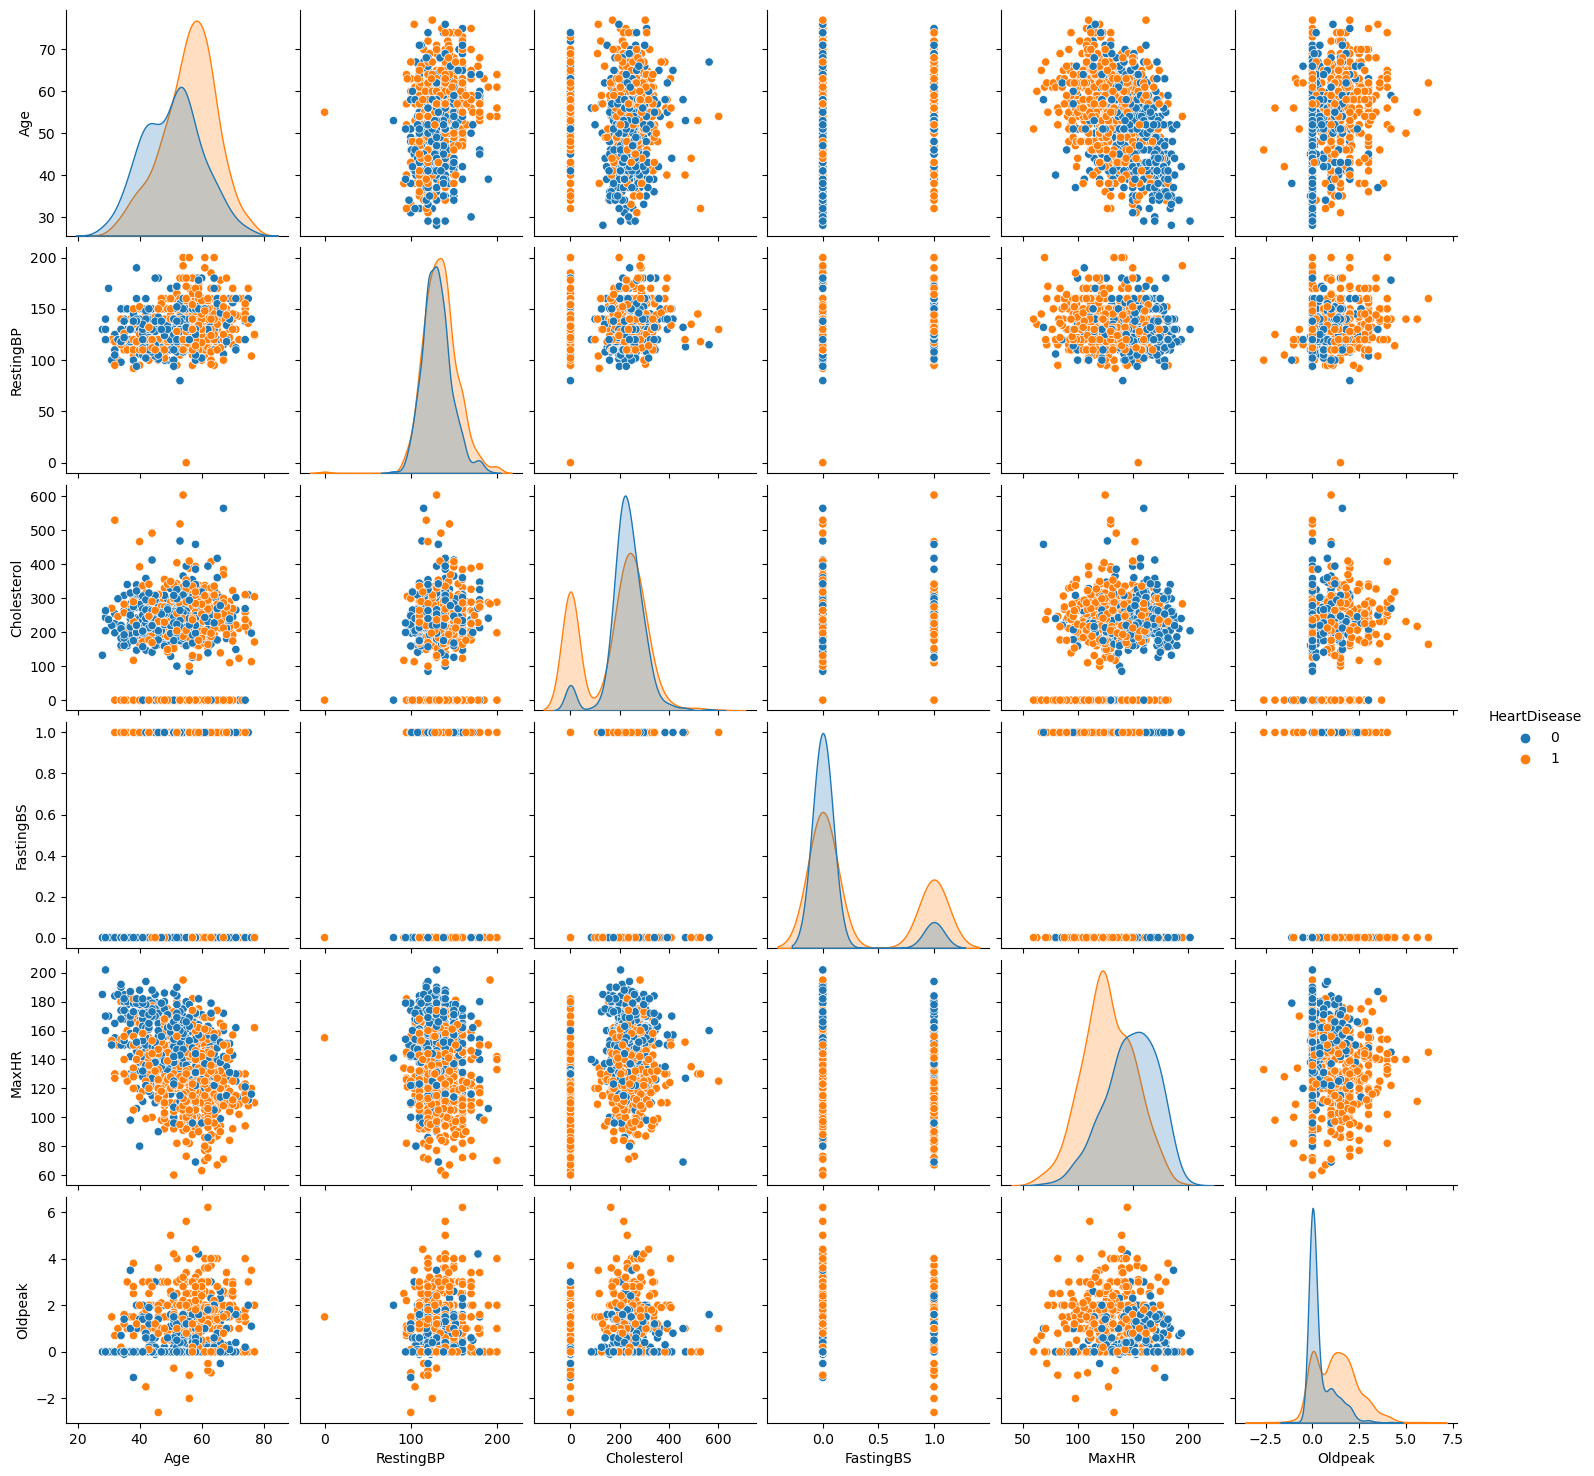

In [47]:
#Draw a pairplot but by using `HeartDisease` variable for coloring. Do you observe anything interesting?
sns.pairplot(heart, hue = "HeartDisease")


exercise problem:
from a Kaggle project which collected data on heart disease from five different sources (https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1).

In [62]:
heart['sex_chestpaintype']=heart.Sex+', '+heart.ChestPainType
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,sex_chestpaintype
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,"M, ATA"
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,"F, NAP"
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,"M, ATA"
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,"F, ASY"
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,"M, NAP"


In [49]:
#Generate a contingency table for `Sex` and `ChestPainType`. How about `Sex` versus `HeartDisease`?
pd.crosstab(heart['Sex'], heart['ChestPainType'])

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,70,60,53,10
M,426,113,150,36


In [50]:
pd.crosstab(heart['Sex'], heart['HeartDisease'])

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


<Axes: xlabel='ChestPainType', ylabel='count'>

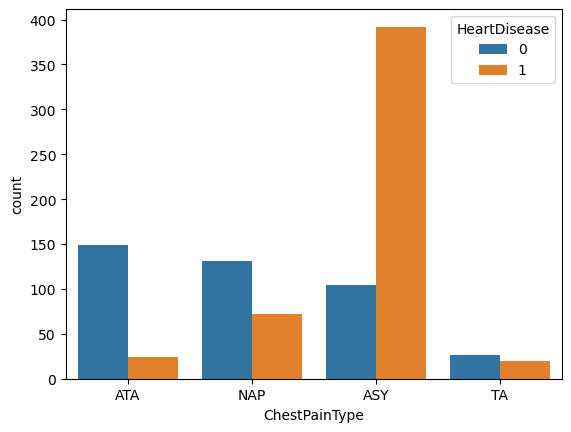

In [51]:
#Draw a countplot of `ChestPainType` but by using `HeartDisease` for coloring. What do you find interesting?
sns.countplot(data=heart, x="ChestPainType", hue = "HeartDisease")

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

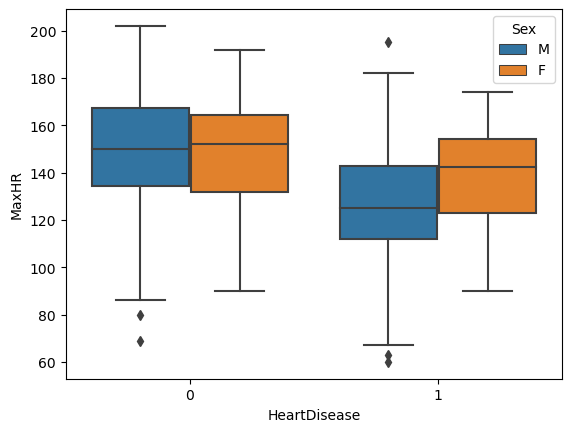

In [52]:
#Draw a boxplot of `MaxHR` across `HeartDisease` but by using `Sex` for coloring. What do you find interesting?
sns.boxplot(data=heart, x="HeartDisease", y="MaxHR", hue='Sex')


In [70]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,sex_chestpaintype
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,"M, ATA"
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,"F, NAP"
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,"M, ATA"
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,"F, ASY"
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,"M, NAP"


In [66]:
#Generate a decision tree with `max_depth = 2` where the target variable is `HeartDisease` and the independent variables are all the numerical variables from `Heart` data set. Which variables are the most important in determining `HeartDisease`? Do you think our decision tree is a "good" classifier?
from sklearn import tree

X = heart.select_dtypes('number').drop(columns='HeartDisease')
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


[Text(0.5, 0.8333333333333334, 'x[5] <= 0.65\ngini = 0.494\nsamples = 918\nvalue = [410, 508]'),
 Text(0.25, 0.5, 'x[2] <= 42.5\ngini = 0.452\nsamples = 472\nvalue = [309, 163]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.237\nsamples = 80\nvalue = [11, 69]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.365\nsamples = 392\nvalue = [298, 94]'),
 Text(0.75, 0.5, 'x[4] <= 150.5\ngini = 0.35\nsamples = 446\nvalue = [101, 345]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.25\nsamples = 362\nvalue = [53, 309]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.49\nsamples = 84\nvalue = [48, 36]')]

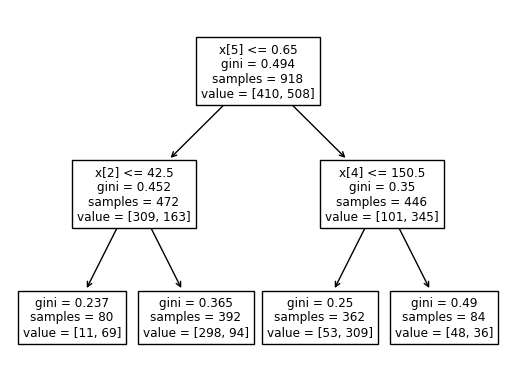

In [72]:
y = heart.iloc[:,-2] #species, y is target variable to predict
model4 = tree.DecisionTreeClassifier(max_depth=2)
model4 = model4.fit(X, y)
tree.plot_tree(model4)

